***TASK 4 - Supervised Machine Learning: Regression***

***Table of Content***

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. Hypothesis & Scatterplot (A)
5. Regression Analysis (A)
6. Performance Improvement (A)
7. Hypothesis & Scatterplot (B)
8. Regression Analysis (B)
9. Performance Improvement (B)

In [30]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis/code')

!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/airbnb-data-analysis/code
/content/drive/MyDrive/airbnb-data-analysis/code


***1. Importing Libraries & Options***

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

# Removing the max column cap
pd.options.display.max_columns = None

***2. Importing Dataframe***

In [33]:
# Importing dataframe

df = pd.read_csv('listings_clean.csv', index_col = False)

***3. Checking the Data***

In [34]:
# 46 columns, but I will only need 2 to create my map

df.shape

(5266, 46)

In [35]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_category
0,144978,216682,2010-08-29,within a few hours,100,89,f,9,t,t,Pacific Heights,37.79233,-122.42431,Private room in rental unit,Private room,1,Unknown,1.0,1.0,55.0,30,365,t,7,24,54,54,120,0,0,2011-07-10,2020-03-31,4.68,4.78,4.45,4.86,4.81,4.81,4.66,f,9,4,5,0,0.86,excellent
1,958,1169,2008-07-31,within an hour,100,98,t,1,t,t,Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,194.0,2,30,t,1,15,35,161,371,57,2,2009-07-23,2022-11-18,4.86,4.93,4.92,4.95,4.88,4.98,4.76,f,1,1,0,0,2.28,excellent
2,5858,8904,2009-03-02,within a few hours,80,71,f,2,t,t,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,235.0,30,60,t,30,60,90,365,111,0,0,2009-05-03,2017-08-06,4.88,4.85,4.87,4.89,4.85,4.77,4.68,f,1,1,0,0,0.67,excellent
3,8142,21994,2009-06-17,within a few hours,100,74,f,12,t,t,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,1,4 shared baths,1.0,1.0,56.0,32,90,t,30,60,90,365,9,1,0,2014-09-08,2022-10-27,4.67,4.44,4.44,4.78,4.78,4.67,4.67,f,12,0,12,0,0.09,excellent
4,8739,7149,2009-01-27,within an hour,100,89,t,2,t,t,Mission,37.76030,-122.42197,Private room in condo,Private room,3,1 private bath,1.0,1.0,129.0,1,26,t,15,41,71,161,761,25,1,2009-08-01,2022-11-18,4.91,4.94,4.94,4.95,4.96,4.93,4.74,f,2,0,2,0,4.68,excellent


***• PLEASE NOTE: From previous cleaning steps, I know the dataframe has no NaN values and no duplicates.***

# ***4. Hypothesis & Scatterplot (A)***

***HYPOTHESIS: "If a host has a higher response rate, then they will have better communication rating."***

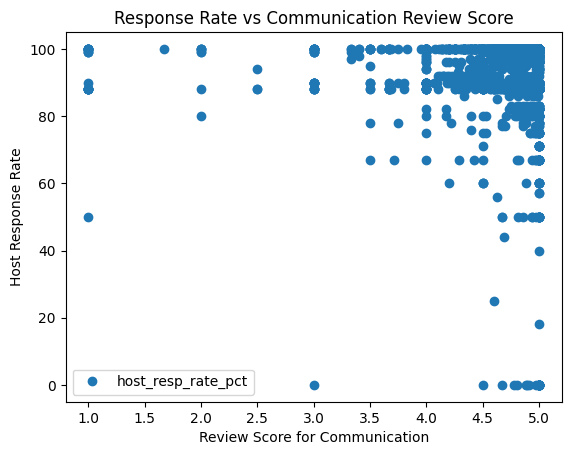

In [36]:
# Creating a scatterplot to explore the relationship between communication rating & host response rate. 

df.plot(x = 'review_scores_communication', y = 'host_resp_rate_pct',style='o')
plt.title('Response Rate vs Communication Review Score')  
plt.xlabel('Review Score for Communication')  
plt.ylabel('Host Response Rate')  
plt.show()

<ipython-input-37-549b8cb94f82>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_scores_communication'], bins=25)


<Axes: xlabel='review_scores_communication', ylabel='Density'>

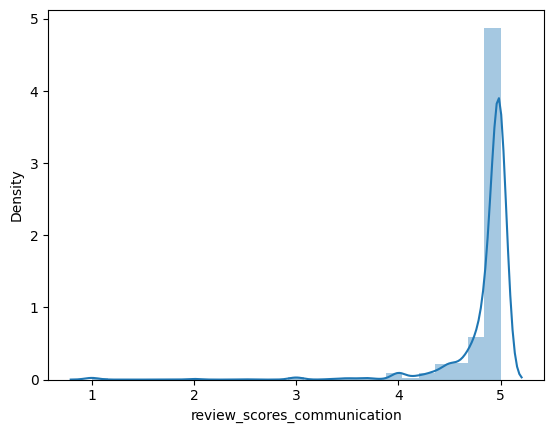

In [37]:
# Looking for extreme values

sns.distplot(df['review_scores_communication'], bins=25)

In [38]:
df['review_scores_communication'].median()

4.97

In [39]:
# Most listings have are reviewed 4.85 or higher

df['review_scores_communication'].describe()

count    5266.000000
mean        4.848749
std         0.381767
min         1.000000
25%         4.870000
50%         4.970000
75%         5.000000
max         5.000000
Name: review_scores_communication, dtype: float64

<ipython-input-40-9edbcf109b4b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['host_resp_rate_pct'], bins=25)


<Axes: xlabel='host_resp_rate_pct', ylabel='Density'>

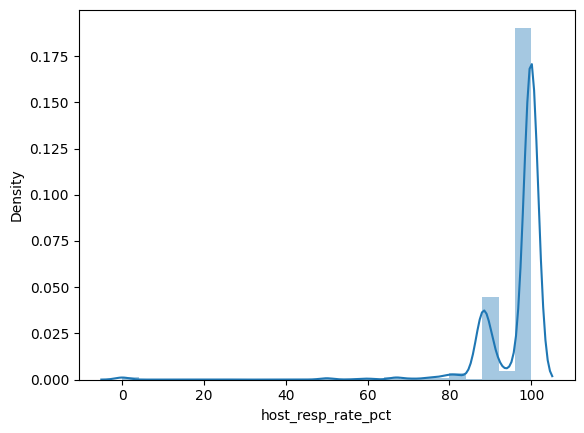

In [40]:
# Looking for extreme values

sns.distplot(df['host_resp_rate_pct'], bins=25)

In [41]:
df['host_resp_rate_pct'].median()

100.0

In [42]:
# Most hosts have a response rate of 96% or higher

df['host_resp_rate_pct'].describe()

count    5266.000000
mean       96.252754
std         9.479729
min         0.000000
25%        97.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_resp_rate_pct, dtype: float64

# ***5. Regression Analysis (A)***

***PREPARING THE DATA***

In [43]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['review_scores_communication'].values.reshape(-1,1)
y = df['host_resp_rate_pct'].values.reshape(-1,1)

In [44]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

***REGRESSION ANALYSIS**

In [45]:
# Creating a regression object.

regression = LinearRegression() 

In [46]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

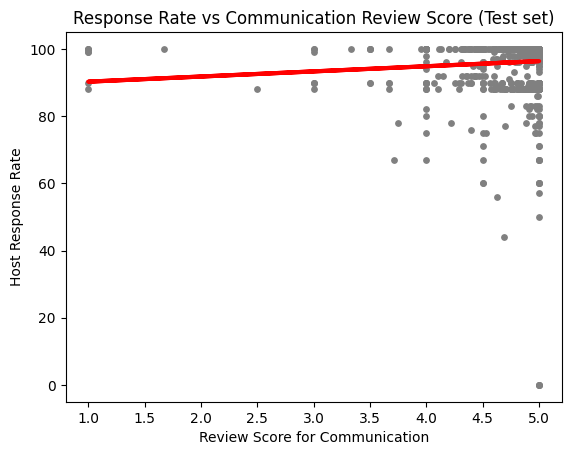

In [48]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation, although postive, is not very strong.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Test set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

In [49]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [50]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.52932801]]
Mean squared error:  65.8497387735347
R2 score:  0.0014771756217721865


# ***COMMENTS***

***The slope is positive, therefore there is a positive relationship between Host Response Rate & Review Score for Communication.***

***The MSE is very high, meaning the regression line is a poor representation of the data.***

***The R2 score is very low, 0.014%, which means the model is a poor fit.***

***COMPARING ACTUAL & PREDICTED VALUES***

In [51]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,100,95.818390
1,88,96.368948
2,100,96.368948
3,100,96.368948
4,100,96.139549
5,100,96.368948
6,100,96.368948
7,98,96.078376
8,100,96.368948
9,100,96.368948


***COMPARING HOW THE REGRESSION FITS THE TRAINING SET***

In [52]:
# Predicting X_train

y_predicted_train = regression.predict(X_train)

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.52932801]]
Mean squared error:  99.70912366171622
R2 score:  0.0034105812839473337


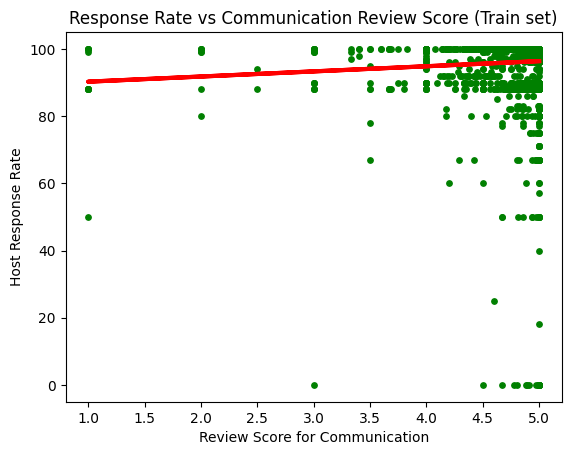

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Train set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

# ***COMMENTS***

***Altogether my hypothesis is false and has been rejected / proven wrong, even though I was convinced host reponse time and review score for communication would strongly correlate.***

***I feel like the instant bookable feature (which then does not require the host reponse) may change the results. Moreover, I feel like looking only at the "normal data" may give me a clearer picture.***

***Normal data = 'review_scores_communication' >= 4.85 & 'host_resp_rate_pct' >= 96***

***6. Performance Improvement (A)***

***Refining Data & Removing Outliers***

In [56]:
# Dropping all instant bookable bookings (which do not require communication form host)

df_no_ib = df.drop(df[(df['instant_bookable'] == 't')].index)

In [57]:
# Checking data (before)

df['instant_bookable'].value_counts()

f    3931
t    1335
Name: instant_bookable, dtype: int64

In [58]:
# Checking data (after)

df_no_ib['instant_bookable'].value_counts()

f    3931
Name: instant_bookable, dtype: int64

In [59]:
# Isolating only ratings equal or above 4.85

df_2 = df_no_ib[df_no_ib['review_scores_communication'] >= 4.85]

In [61]:
df.host_resp_rate_pct.value_counts()

100    3726
88      679
90      244
99      111
98       77
96       59
92       58
97       39
80       38
0        25
67       25
94       22
82       22
75       18
89       16
50       16
83       15
95       13
60       11
78       11
71        9
86        8
77        6
93        6
91        3
57        2
25        1
85        1
76        1
18        1
56        1
44        1
40        1
Name: host_resp_rate_pct, dtype: int64

In [62]:
# Isolating only response rate equal or above 96%

df_3 = df_2[df_2['host_resp_rate_pct'] >= 96]

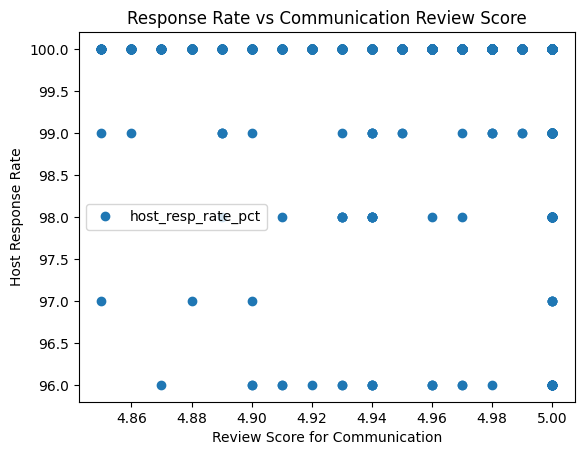

In [63]:
# Creating a scatterplot to explore the relationship between variables. 

df_3.plot(x = 'review_scores_communication', y = 'host_resp_rate_pct',style='o')
plt.title('Response Rate vs Communication Review Score')  
plt.xlabel('Review Score for Communication')  
plt.ylabel('Host Response Rate')  
plt.show()

In [64]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_3['review_scores_communication'].values.reshape(-1,1)
y = df_3['host_resp_rate_pct'].values.reshape(-1,1)

In [65]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
# Creating a regression object.

regression = LinearRegression()

In [67]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

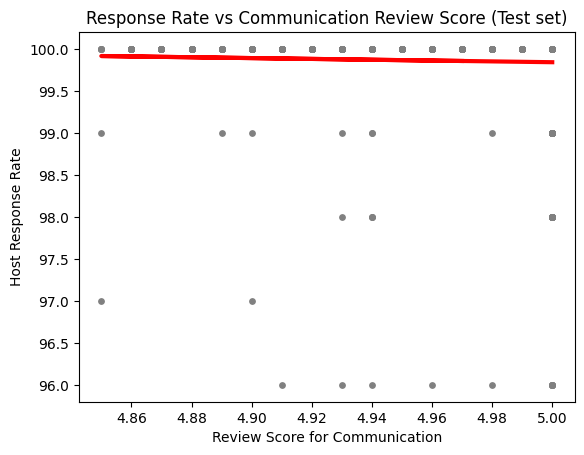

In [69]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation, although postive, is not very strong.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Response Rate vs Communication Review Score (Test set)')
plot_test.xlabel('Review Score for Communication')
plot_test.ylabel('Host Response Rate')
plot_test.show()

In [70]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [71]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.49179077]]
Mean squared error:  0.37579877699376074
R2 score:  6.696505472814085e-05


# ***COMMENTS/CONCLUSION***

***When dropping some of the data and zooming in to explore the relationship within the main part of the data, I still come to the same conclusion; there is not a strong correlation between the host response rate and the review score for communication.***

***The model performed poorly and this means I should focus on other variables and find other correlation / relationships in the data.***

# ***7. Hypothesis & Scatterplot (B)***

***HYPOTHESIS: "If a listing has more reviews, then its price per night will be higher."***

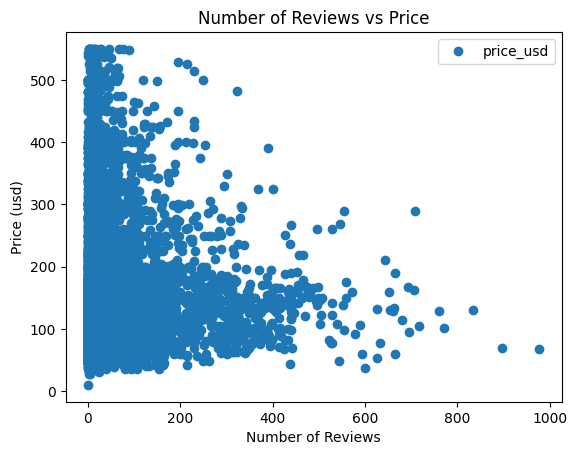

In [72]:
# Creating a scatterplot to explore the relationship between number of reviews & price. 

df.plot(x = 'number_of_reviews', y = 'price_usd',style='o')
plt.title('Number of Reviews vs Price')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Price (usd)')  
plt.show()

<ipython-input-73-adaa7724e8ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_reviews'], bins=25)


<Axes: xlabel='number_of_reviews', ylabel='Density'>

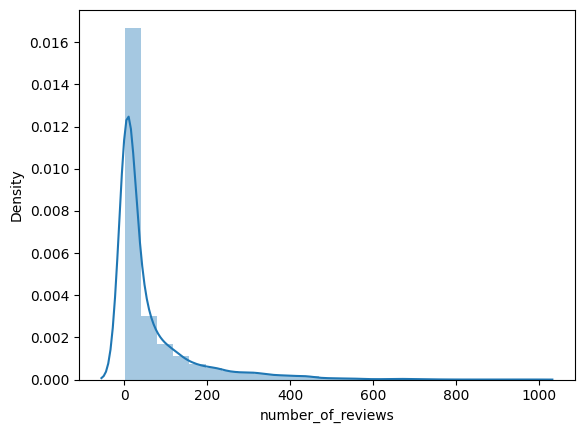

In [73]:
# Looking for extreme values

sns.distplot(df['number_of_reviews'], bins=25)

In [75]:
# Checking the data
# 50% of listings have 16 or less reviews, 75% of listings have 70 or less reviews. 

df['number_of_reviews'].describe()

count    5266.000000
mean       61.362514
std       103.219907
min         1.000000
25%         4.000000
50%        16.000000
75%        70.000000
max       977.000000
Name: number_of_reviews, dtype: float64

In [76]:
# Checking the data (head & tail)

df['number_of_reviews'].sort_values(ascending=False)

830     977
837     896
2818    834
5115    771
4       761
       ... 
2916      1
4808      1
4002      1
2917      1
3282      1
Name: number_of_reviews, Length: 5266, dtype: int64

In [77]:
df['number_of_reviews'].value_counts().sort_index().head(10)

1     526
2     397
3     260
4     239
5     213
6     155
7     138
8     120
9     102
10     94
Name: number_of_reviews, dtype: int64

<ipython-input-78-3fee4169c68b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_usd'], bins=25)


<Axes: xlabel='price_usd', ylabel='Density'>

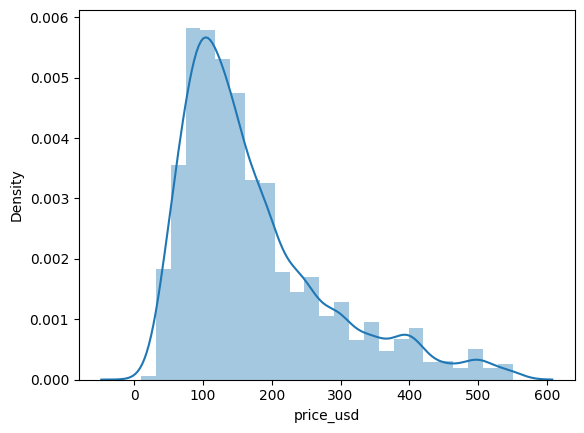

In [78]:
# Looking for extreme values

sns.distplot(df['price_usd'], bins=25)

In [80]:
# Checking the data
# The average price per night is $173 but half of the listings are $143 or less

df['price_usd'].describe()

count    5266.000000
mean      173.467148
std       106.530072
min        10.000000
25%        98.000000
50%       143.000000
75%       220.000000
max       550.000000
Name: price_usd, dtype: float64

In [81]:
# Checking the data

df['price_usd'].sort_values(ascending=False)

5145    550.0
4547    550.0
5227    550.0
262     550.0
500     550.0
        ...  
4307     30.0
82       30.0
3158     28.0
3630     27.0
5072     10.0
Name: price_usd, Length: 5266, dtype: float64

In [82]:
# Checking the data
df['price_usd'].value_counts().sort_index().head(10)

10.0    1
27.0    1
28.0    1
30.0    2
31.0    1
32.0    2
33.0    2
34.0    2
35.0    6
36.0    5
Name: price_usd, dtype: int64

In [83]:
# Checking the data
# A few luxury / extremely expensive listings

df['price_usd'].value_counts().sort_index().tail(10)

529.0     3
535.0     1
537.0     2
538.0     2
539.0     1
542.0     1
543.0     1
545.0     2
549.0     2
550.0    15
Name: price_usd, dtype: int64

***8. Regression Analysis (B)***

In [84]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['number_of_reviews'].values.reshape(-1,1)
y = df['price_usd'].values.reshape(-1,1)

In [85]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
# Creating a regression object.

regression = LinearRegression()

In [87]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

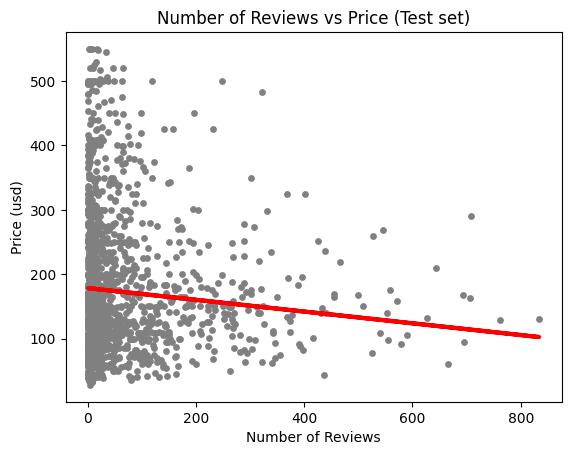

In [89]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation is negative! (but very weak)

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price (usd)')
plot_test.show()

In [90]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [91]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.09119718]]
Mean squared error:  11567.902707739599
R2 score:  -0.0008500208069730508


# ***COMMENTS***

***The slope is negative, therefore there is a negative relationship between Number of Reviews & Price.***

***The MSE is very high, meaning the regression line is a poor representation of the data.***

***The R2 score is very low, which means the model is a poor fit.***

***9. Performance Improvement (B)***

In [94]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [95]:
df.price_usd.value_counts()

125.0    104
150.0    103
100.0     97
109.0     82
95.0      80
250.0     78
120.0     74
99.0      73
149.0     69
85.0      69
90.0      68
200.0     68
180.0     64
60.0      61
110.0     61
105.0     58
175.0     57
130.0     56
89.0      55
75.0      54
140.0     52
199.0     51
135.0     51
80.0      50
115.0     50
300.0     49
145.0     46
165.0     44
225.0     42
350.0     40
160.0     39
70.0      38
50.0      38
400.0     35
170.0     34
65.0      33
220.0     32
129.0     31
78.0      31
409.0     30
169.0     30
243.0     29
79.0      29
275.0     29
195.0     28
189.0     28
119.0     28
500.0     27
139.0     27
45.0      27
83.0      27
190.0     27
235.0     25
185.0     25
98.0      24
325.0     23
59.0      23
88.0      23
143.0     23
82.0      23
81.0      22
72.0      22
55.0      22
93.0      22
56.0      22
116.0     22
375.0     21
144.0     21
128.0     21
69.0      21
118.0     21
155.0     20
450.0     20
103.0     20
101.0     20
132.0     19
280.0     19

In [96]:
pd.reset_option('all')

<ipython-input-96-056908e7e3ef>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-96-056908e7e3ef>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-96-056908e7e3ef>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


In [98]:
df.price_usd.describe()

count    5266.000000
mean      173.467148
std       106.530072
min        10.000000
25%        98.000000
50%       143.000000
75%       220.000000
max       550.000000
Name: price_usd, dtype: float64

In [99]:
# Isolating only listings priced below $250
# $250 seems like a reasonable high threshold for an average listing

df_A = df[df['price_usd'] <= 250]

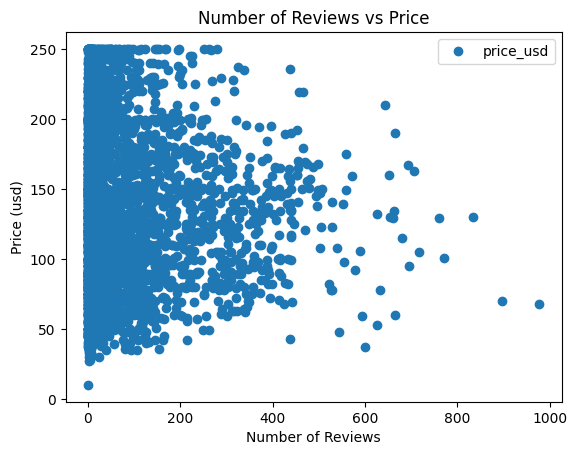

In [100]:
# Creating a scatterplot to explore the relationship between number of reviews & price.

df_A.plot(x = 'number_of_reviews', y = 'price_usd',style='o')
plt.title('Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (usd)')
plt.show()

In [101]:
# Step 1: Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_A['number_of_reviews'].values.reshape(-1,1)
y = df_A['price_usd'].values.reshape(-1,1)

In [102]:
# Step 2: Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
# Creating a regression object.

regression = LinearRegression() 

In [104]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [105]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

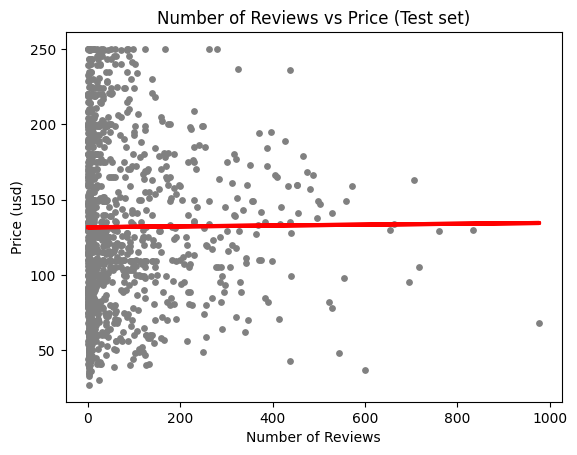

In [106]:
# Creating a plot that shows the regression line from the model on the test set.
# It seems the correlation is still negative and stronger!

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price (usd)')
plot_test.show()

In [107]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [108]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00292038]]
Mean squared error:  2935.3425244202826
R2 score:  -0.00035870082204403353


# ***COMMENTS***

***Here I come to the same conclusions again, therefore my hypothesis is rejected.***

***This means that the number of reviews does not affect the price per night postively, if anything if affects it negatively.***

***We could extrapolate that the competition is fierce and therefore hosts with more reviews put their prices a little lower than average to attract more bookings.***